In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [35]:
data = pd.read_table("C:/Users/33789/OneDrive/Desktop/EDA/data_madness/netflix_daily_top_10.csv", ',')
data.head()

C:\Users\33789\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_table except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [36]:
def remove_previous(data_rem, ):
    # Identify the columns
    data_rem['Days_10'] = 0
    data_rem['Viewership'] = 0
    for ind, row in data_rem.iterrows():

        temp_df = data_rem.loc[data_rem['Title'] == row['Title']]
        mini_days = temp_df['Days In Top 10'].min()
        mini_view = temp_df['Viewership Score'].min()

        data_rem.iloc[[ind],[10]] = row['Days In Top 10'] - mini_days + 1
        data_rem.iloc[[ind],[11]] = row['Viewership Score'] - mini_view + (11 - row['Rank'])
    # display(row.head())
    # print(row.shape)


    return data_rem

In [37]:
# 3. What are most common during the holidays, TV shows or movies?
# Is there a bias on the duration of how long content is in top 10 of own content versus foreign content
# 2. How long does it take for content to reach the top 5 (comparison of movie vs tv show)
data = remove_previous(data)
data =data.replace({'Netflix Exclusive': {None: 'No'}})
# data.isna().any()
exclusive = data[data['Netflix Exclusive'] == 'Yes']
foreign = data[data['Netflix Exclusive'] == 'No']

titles = data.set_index('Title')
#getting rid of the dates and Year/Last Week Rank
titles = titles[["Rank",  "Type", "Netflix Exclusive", "Netflix Release Date", "Days In Top 10", "Viewership Score"]]
titles = data.groupby('Title').agg({'Rank' : 'mean', 'Type': 'first', 'Netflix Exclusive': 'first', 'Netflix Release Date': 'first', "Days In Top 10": 'max', 'Viewership':'max'})

titles.head()

,Rank,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership
Title,,,,,,
#Alive,5.333333,Movie,Yes,"Sep 8, 2020",6,30
#blackAF,6.625000,TV Show,Yes,"Apr 17, 2020",8,32
(Un)Well,7.000000,TV Show,Yes,"Aug 12, 2020",6,24
13 Reasons Why,3.636364,TV Show,Yes,"Mar 31, 2017",22,155
17 Again,6.285714,Movie,No,"Jan 1, 2021",7,33


In [38]:
data.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score,Days_10,Viewership
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90,1,10
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45,1,9
2,2020-04-01,3,3,2,All American,TV Show,No,"Mar 28, 2019",9,76,1,8
3,2020-04-01,4,4,-,Blood Father,Movie,No,"Mar 26, 2020",5,30,1,7
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55,1,6


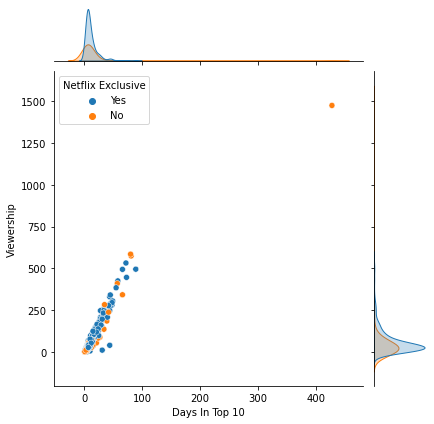

In [69]:
p = sns.jointplot(titles, x = 'Days In Top 10', y = 'Viewership', hue = 'Netflix Exclusive')
# p.set(xlim = (0,10), ylim =(0,100))
# p.set_axis_labels("Days in Top 10", "rank")


C:\Users\33789\AppData\Local\Temp/ipykernel_35264/560568017.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avgE = titles[titles['Netflix Exclusive'] == 'Yes'].mean()
C:\Users\33789\AppData\Local\Temp/ipykernel_35264/560568017.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avgN = titles[titles['Netflix Exclusive'] == 'No'].mean()


Text(0.5, 1.0, 'Average Rankig Per Title')

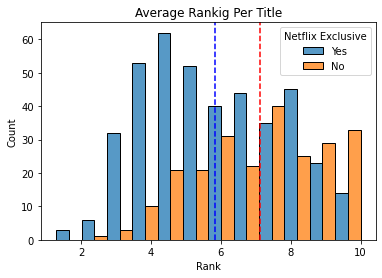

In [40]:
avgE = titles[titles['Netflix Exclusive'] == 'Yes'].mean()
avgN = titles[titles['Netflix Exclusive'] == 'No'].mean()
sns.histplot(data=titles, x="Rank", hue="Netflix Exclusive",  kde=False, multiple="dodge")
plt.axvline(x=avgE['Rank'], color='blue', linestyle='dashed')
plt.axvline(x=avgN['Rank'], color='red', linestyle='dashed')
plt.title('Average Rankig Per Title')


In [41]:
excusive = titles[titles['Netflix Exclusive'] == 'Yes'].count()[0]
nonEx= titles[titles['Netflix Exclusive'] == 'No'].count()[0]
avgE = titles[titles['Netflix Exclusive'] == 'Yes'].mean()
avgN = titles[titles['Netflix Exclusive'] == 'No'].mean()
print('non exckusive',avgN)
print('exclusive', avgE)

non exckusive Rank               7.116823
Days In Top 10    10.614407
Viewership        47.546610
dtype: float64
exclusive Rank               5.833315
Days In Top 10    11.508557
Viewership        64.415648
dtype: float64


C:\Users\33789\AppData\Local\Temp/ipykernel_35264/4212514244.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avgE = titles[titles['Netflix Exclusive'] == 'Yes'].mean()
C:\Users\33789\AppData\Local\Temp/ipykernel_35264/4212514244.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avgN = titles[titles['Netflix Exclusive'] == 'No'].mean()


In [42]:
avgE['Rank']


5.833315486945571

In [43]:
avgN['Rank']

7.116823350401959

Text(0.5, 1.0, 'General Ranking Frequency')

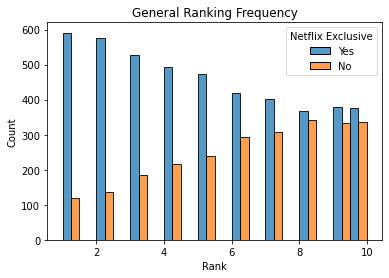

In [44]:
sns.histplot(data=data, x="Rank", hue="Netflix Exclusive", multiple="dodge")
plt.title('General Ranking Frequency')

<AxesSubplot:xlabel='Rank', ylabel='Density'>

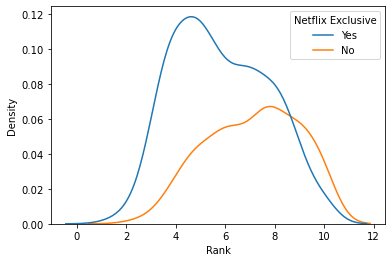

In [45]:
sns.kdeplot(data=titles, x="Rank", hue="Netflix Exclusive")

In [46]:
print(exclusive.shape)

(4599, 12)


In [47]:
print(foreign.shape)

(2501, 12)


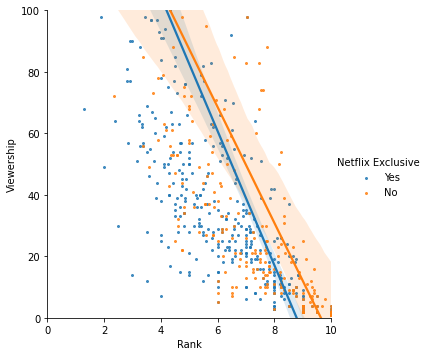

In [48]:
# Days in TOP 10 or VIEWERSHIP SCORE
g = sns.lmplot(data = titles,  x = 'Rank', y = 'Viewership',fit_reg=True, hue = "Netflix Exclusive", scatter_kws={"s": 4})
# sns.plt.ylim(0,)
g.set(xlim = (0,10), ylim =(0,100))
# sns.scatterplot(data= titles, x = 'Rank', hue = 'Netflix Exclusive')

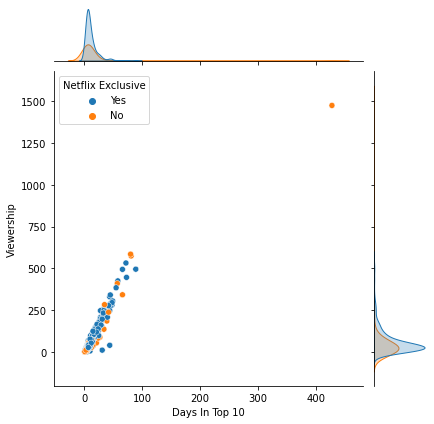

In [49]:
s = sns.jointplot(
    data=titles, x="Days In Top 10", y="Viewership", hue="Netflix Exclusive"
)
# s.set(xlim = (0,200), ylim =(0,400))

In [1]:
titles[titles['Viewership '] >600]

NameError: name 'titles' is not defined

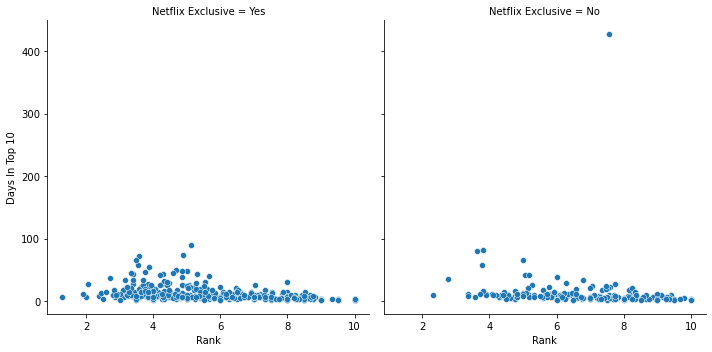

In [52]:
sns.relplot(data=titles, x="Rank", y="Days In Top 10",  col="Netflix Exclusive")

In [53]:
data[data['Type']== 'Stand-Up Comedy'].count()

As of                   41
Rank                    41
Year to Date Rank       41
Last Week Rank          41
Title                   41
Type                    41
Netflix Exclusive       41
Netflix Release Date    41
Days In Top 10          41
Viewership Score        41
Days_10                 41
Viewership              41
dtype: int64

In [54]:
data['Type'].unique()

array(['TV Show', 'Movie', 'Stand-Up Comedy', 'Concert/Perf…'],
      dtype=object)

In [58]:
ne =titles[titles['Netflix Exclusive'] == 'Yes']
nn = titles[titles['Netflix Exclusive'] == 'No']

In [74]:
nn_high = nn[nn['Rank']<6]
nn_high.count()
nn = nn.drop('Cocomelon')


In [62]:
ne_high = ne[ne['Rank']<6]
ne_high.count()

Rank                    221
Type                    221
Netflix Exclusive       221
Netflix Release Date    221
Days In Top 10          221
Viewership              221
dtype: int64

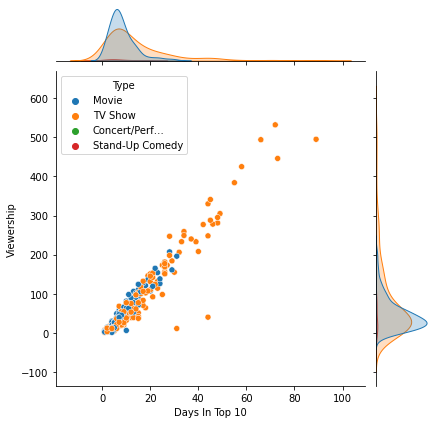

In [70]:
p = sns.jointplot(ne, x = 'Days In Top 10', y = 'Viewership', hue = 'Type')
# p.set(xlim = (0,10), ylim =(0,100))
# p.set_axis_labels("Days in Top 10", "rank")


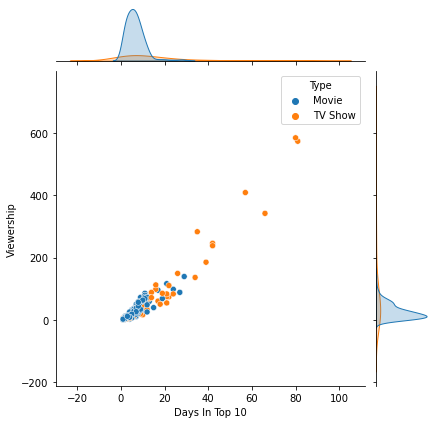

In [75]:
p = sns.jointplot(nn, x = 'Days In Top 10', y = 'Viewership', hue = 'Type')

In [78]:
cocomelon = data[data["Title"] == 'Cocomelon']

In [80]:
cocomelon.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score,Days_10,Viewership
1498,2020-08-28,9,-,-,Cocomelon,TV Show,No,"Jun 1, 2020",1,2,1,2
1508,2020-08-29,9,9,-,Cocomelon,TV Show,No,"Jun 1, 2020",2,4,2,4
1518,2020-08-30,9,9,-,Cocomelon,TV Show,No,"Jun 1, 2020",3,6,3,6
1528,2020-08-31,9,9,-,Cocomelon,TV Show,No,"Jun 1, 2020",4,8,4,8
1535,2020-09-01,6,9,-,Cocomelon,TV Show,No,"Jun 1, 2020",5,13,5,16


<AxesSubplot:ylabel='Rank'>

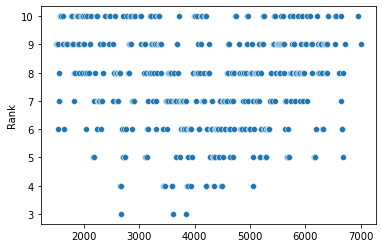

In [82]:
sns.scatterplot(cocomelon['Rank'])

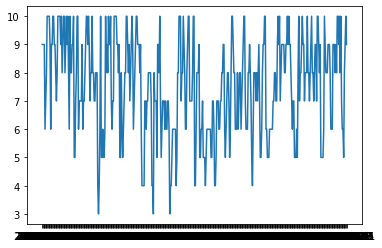

In [83]:
plt.plot(cocomelon['As of'], cocomelon['Rank'])


In [87]:
titles.loc['Cocomelon']

Rank                       7.556075
Type                        TV Show
Netflix Exclusive                No
Netflix Release Date    Jun 1, 2020
Days In Top 10                  428
Viewership                     1474
Name: Cocomelon, dtype: object